**Análisis de la performance de los atletas olímpicos a lo largo de la historia.**

**Introducción**

El propósito de este estudio es analizar la obtención de medallas por parte de los atletas olímpicos a través de la historia para encontrar relaciones entre las performances y otras variables que nos lleve a predecir si un atelta de élite obtendrá una medalla olímpica y cuál sería.

Según Wikipedia, se otorga una medalla Olímpica a los competidores exitosos en uno de los Juegos Olímpicos. Hay tres clases de medallas: oro, otorgada al ganador; plata, otorgada al subcampeón; y bronce, otorgado al tercer lugar. La concesión de premios se detalla en los protocolos Olímpicos.

Las medallas totales ganadas se utilizan para clasificar a las naciones competidoras en las tablas de medallas, estas pueden compilarse para una disciplina específica, para una Olimpiada en particular o para todo el tiempo. Estos totales siempre suman las obtenciones por eventos en lugar de las medallas reales. Una victoria en un evento por equipos equivale a un solo oro para tales clasificaciones, aunque cada miembro del equipo recibe una medalla física.

Un concepto importante es el de Comité Olímpico Nacional (NOC, por sus siglas en inglés), según Wikipedia es la sede nacional de cada país encargada de fomentar y proteger al Movimiento Olímpico en sus respectivos países. Estos comités también promueven el desarrollo de los atletas y preparan a los entrenadores y oficiales en un nivel nacional.

La estrategia del trabajo será segmentar el Dataset por distintos criterios para encontrar relaciones fundamentadas. Se utilizarán las librerías de Numpy, Pandas, Matplotlib y Seaborn para trabajar y visualizar las hipótesis. Posteriormente se utilizará la librería Scikit-learn para la construcción del modelo de aprendizaje automático.

En función de las necesidades se agregarán otras librerías.

**Objetivo**

Crear un modelo de clasificación que permita predecir si un atleta de elite obtendrá una medalla y cuál sería (Oro, Plata o Bronce)

**Contexto Comercial**

Los Comités Olímpicos Nacionales hacen grandes esfuerzos económicos y logísticos para apoyar y acompañar a los atletas de elite en su camino a la máxima competencia deportiva: las Olimpiadas. Sería importante predecir si un atleta, dadas ciertas caracterísiticas, podría ser medallista olímpico de manera de reforzar y redoblar el apoyo, o identificar en qué momento el atleta está en su mejor estado o situación para ser aspirante a una presea.

A los sponsors, gobiernos y demás empresas que colaboran en la carrera deportiva de los atletas también les interesa conocer si un atleta fichado para dar apoyo es un potencial medallista medallista.

Adicionalmente los atletas hacen grandes esfuerzos económicos, mantienen largas jornadas de entrenamiento diario en pos del objetivo olímpico puesto a disposición cada 4 años; sin olvidar las renuncias sociales, familiares, académicas, laborales que muchos de ellos deben hacer en la búsqueda del ansiado objetivo olímpico. Si hay condiciones que hagan propensa la obtención de la presea y esa condición pudiera ser conocida, elegida y puesta en práctica por el atleta sería un as bajo la manga para trabajar en ello en la búqueda del logro olímpico.

**Problema Comercial**

Con este análisis se intentará predecir si un atleta de elite podría ser medallista olímpico dadas determinadas características. Y encontrar las variables o condiciones que favorezcan la consecución de una medalla.

**Hipótesis**

Se espera encontrar respuesta a las siguientes preguntas:

¿Existe alguna relación entre la cantidad de medallas obtenidas por los atletas y la edad?

¿El peso y la altura de los atletas puede ser determinante para predecir una performance exitosa?

¿El NOC al cual representan los atletas puede ser determinante a la hora de conseguir una presea?

**Contexto analítico**

Se trabajará con el dataset denominado athlete_events.csv.

Este es un conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos desde Atenas 1896 hasta Río 2016 (1)

El archivo atlhets_events.csv contiene 271116 filas y 15 columnas. Cada fila corresponde a un atleta individual compitiendo en un evento olímpico individual. Las columnas son:

ID - Número único para cada atleta

Nombre - Nombre del atleta

Sexo - M o F

Edad - Años del participante

Altura - En centímetros

Peso - En kilogramos

Equipo - Nombre del equipo (País)

NOC - Código de 3 letras del Comité Olímpico Nacional al que representa el atleta

Juegos - Año y Temporada (Invierno o Verano)

Año - Año de la Olimpiada

Temporada - Invierno o Verano

Ciudad - Ciudad anfitriona

Deporte - Deporte

Evento - Competencia

Medalla : oro, plata, bronce o NA.

*(1) kaggle. Gabriel Preda*

**Hipótesis**

Se espera encontrar respuesta a las siguientes preguntas:

¿Existe alguna relación entre la cantidad de medallas obtenidas por los atletas y la edad?

¿El peso y la altura de los atletas puede ser determinante para predecir una performance exitosa?

¿El NOC al cual representan los atletas puede ser determinante a la hora de conseguir una presea?

**Segmentación del archivo en 2 subconjuntos en función del Sexo**

En los primeros juegos, celebrados en Atenas en 1896, las mujeres estaban totalmente ausentes y, en los siguientes, en 1900, su representación sería el 2% del total de los atletas, participando de aquellas disciplinas que eran consideradas acordes a la naturaleza femenina, como golf y tenis.

En la antigüedad, el deporte serviría para reforzar la división sexual del trabajo y que ésta se entienda como el estado natural de las cosas. Tomó más de 100 años (114 para ser exactos) para que la participación fuera "casi" igualitaria: los Juegos de Londres de 2012 se llamarían los “Juegos de las Mujeres” por el récord de participación femenina y por haber sido la primera vez que las mujeres compitieron en todas las categorías.

Fuente: http://www.juegosolimpicosygenero.com/

Dada esta diferencia en la participación histórica es que se ha segmentado el análisis en función del género de los ateltas, buscando responder las preguntas para ambos conjuntos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)
%matplotlib inline
import seaborn as sb
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
mpl.rcParams['figure.dpi'] = 400
import graphviz 
from google.colab import drive
import os 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
sns.set_style('whitegrid')
drive.mount ('/content/gdrive') 
from statistics import mode

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


**EDA**

In [ ]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [ ]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


In [ ]:
df_atletas.shape

(271116, 15)

División del dataframe original en 2 subconjuntos en función del género de los atletas

In [ ]:
df_M=df_atletas[df_atletas.Sex == "F" ] # dataframe para atletas Mujeres
df_H=df_atletas[df_atletas.Sex == "M" ] # dataframe para atletas Hombres

**MUJERES EN LOS JUEGOS OLÍMPICOS**

In [ ]:
df_M.shape

(74522, 15)

In [ ]:
df_M.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
print(df_M.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74098 non-null  float64
 4   Height  67378 non-null  float64
 5   Weight  66771 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   11253 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB
None


**1 - Limpieza de Datos**

Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas.

1) En la columna "Medal" se reemplazan los valores NA con la expresión "sin medalla"

In [ ]:
x = df_M["Medal"]

df_M["Medal"].fillna('sin medalla', inplace = True)

df_M["Medal"].replace([0], 'sin medalla')

4         sin medalla
5         sin medalla
6         sin medalla
7         sin medalla
8         sin medalla
             ...     
271080         Bronze
271099    sin medalla
271102         Bronze
271103         Silver
271110    sin medalla
Name: Medal, Length: 74522, dtype: object

 2) Se completan los valores nulos de "Age", "Height" y "Weight" con los promedios.

In [ ]:
x = df_M["Age"].mean()
df_M["Age"].fillna(x, inplace = True) #edad

x = df_M["Height"].mean()
df_M["Height"].fillna(x, inplace = True) #altura

x = df_M["Weight"].mean()
df_M["Weight"].fillna(x, inplace = True) #peso

In [ ]:
df_M

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,sin medalla
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",sin medalla
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [ ]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74522 non-null  float64
 4   Height  74522 non-null  float64
 5   Weight  74522 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   74522 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB


**2 - Análisis de Medallas**

**Visualización de la proporción de cada color de medalla**

In [ ]:
Medallas_por_Color=df_M[['Medal','ID']].groupby(by='Medal').count()
Medallas_por_Color

,ID
Medal,
Bronze,3771
Gold,3747
Silver,3735
sin medalla,63269


In [ ]:
Medallas_por_Color.index

Index(['Bronze', 'Gold', 'Silver', 'sin medalla'], dtype='object', name='Medal')

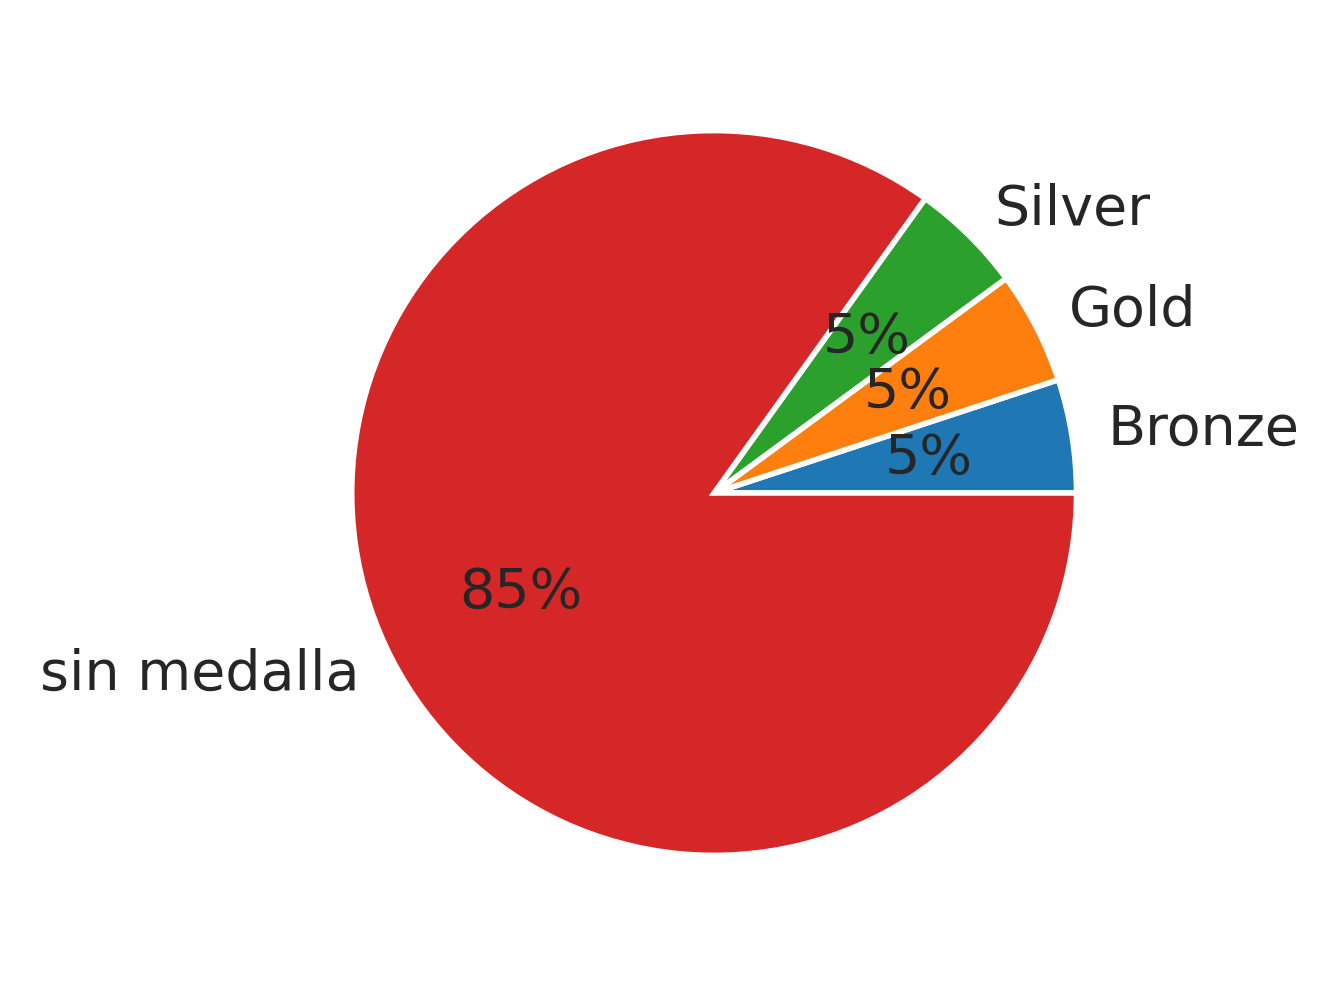

In [ ]:
fig,ax = plt.subplots(figsize =(6, 3))
plt.pie(Medallas_por_Color.ID, labels=Medallas_por_Color.index,autopct = '%0.0f%%')
plt.show()

Se visualiza que hay un **desbalance en los datos**. Donde la categoría "sin medalla" supera ampliamente al resto de las categorías ("Gold", "Silver" y "Bronze")

**Insight 1:** Sólo el 15% de las atletas obtiene una medalla, y con 5% de posibilidad de obtención para cada color. El 85% de las participantes no obtienen preseas.

**Segmentación el Dataframe df_M por color de Medalla para visualizar el comportamiento de la variable "Medal" en función de otras características**

In [ ]:
df_M_Oro=df_M[df_M.Medal == "Gold" ] # dataframe para atletas Mujeres con medallas de oro
df_M_Plata=df_M[df_M.Medal == "Silver" ] # dataframe para atletas Mujeres con medallas de plata
df_M_Bronce=df_M[df_M.Medal == "Bronze" ] # dataframe para atletas Mujeres con medallas de bronce
df_M_Sin_M=df_M[df_M.Medal == "sin medalla" ] # dataframe para atletas Mujeres sin medallas

**3 - Análisis de la Edad de las Atletas**

**Distribución de las medallas según la edad de las ateltas**

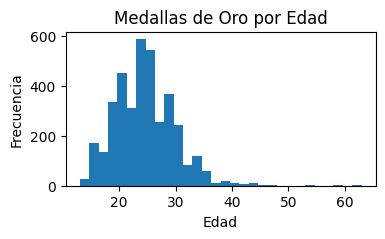

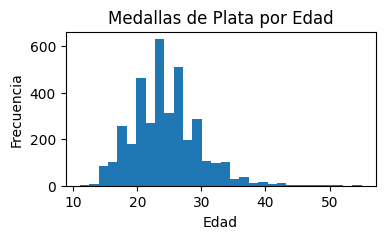

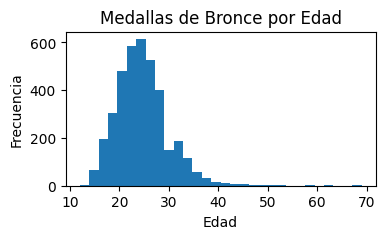

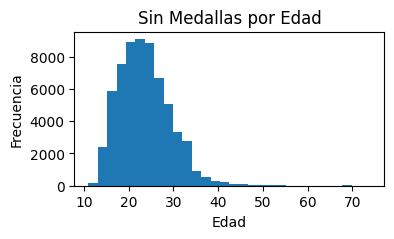

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Edad')
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Edad')

plt.show()

**a - Oro**









In [ ]:
df_M_Oro.Age.describe() # Valores Estadísticos

count    3747.000000
mean       24.372084
std         5.219538
min        13.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        63.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Oro.Age) # Moda

22.0

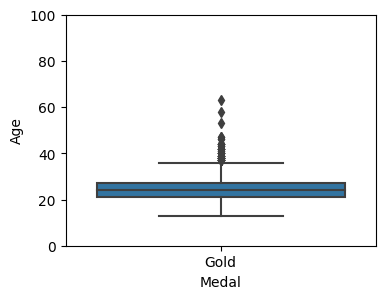

In [ ]:
# Valores Atípicos 
var = 'Age'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

**b - Plata**

In [ ]:
df_M_Plata.Age.describe() # Valores Estadísticos

count    3735.000000
mean       24.443748
std         5.252998
min        11.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        55.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Plata.Age) # Moda

23.0

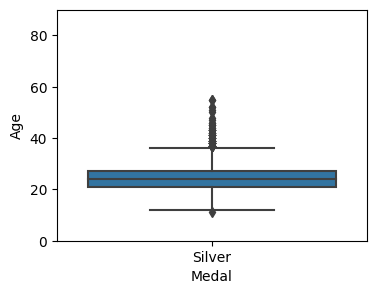

In [ ]:
#  Valores Atípicos 
var = 'Age'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

**c - Bronce**

In [ ]:
df_M_Bronce.Age.describe() # Valores Estadísticos

count    3771.000000
mean       24.706673
std         5.329274
min        12.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        69.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Bronce.Age) # Moda

25.0

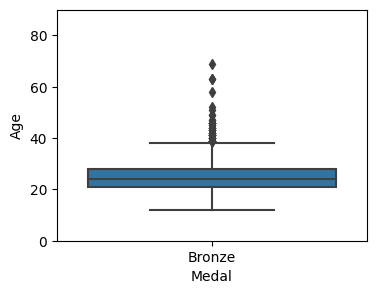

In [ ]:
#  Valores Atípicos  
var = 'Age'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

**d - Sin Medalla**

In [ ]:
df_M_Sin_M.Age.describe() # Valores Estadísticos 

count    63269.000000
mean        23.595019
std          5.854045
min         11.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         74.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Sin_M.Age) # Moda

21.0

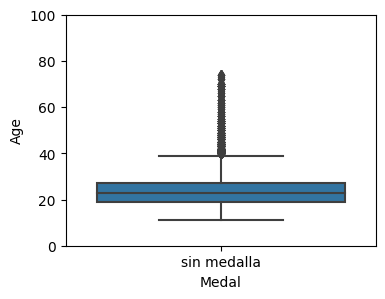

In [ ]:
# Valores Atípicos 
var = 'Age'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

**Hallazgos sobre la Edad**

**Insight 2**: El promedio de edad de consecución de una medalla (de cualquier color) es 24 años.

**Insight 3:** El promedio de edad de las atletas que no consiguen medallas es 23 años. 

**Insight 4:**  Hasta los 27 años se acumula el 75% de altletas que obtienen medallas de oro.

**Insight 5:** Hasta los 27 años se acumula el 75% de altletas que obtienen medallas de plata.

**Insight 6:**  Hasta los 28 años se acumula el 75% de altletas que obtienen medallas de bronce.

**Insight 7:** Hasta los 27 años se acumula el 75% de altletas que no obtienen medallas.

**Insight 8:** La desviación estándar ronda los 5 años para todas las categorías. 

**Insight 9:** La moda de las atletas que consiguen atletas es de 22, 23 y 25 para Oro, Plata y Bronce respectivamente. La edad más frecuente en que no se obienen medallas es 21 años.

**3 - Análisis de la Altura de las Atletas**

**Distribución de las medallas según la altura de las atletas**

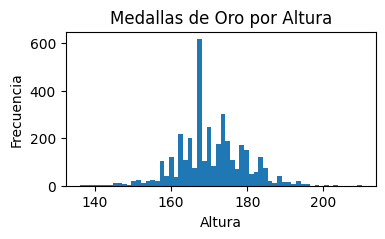

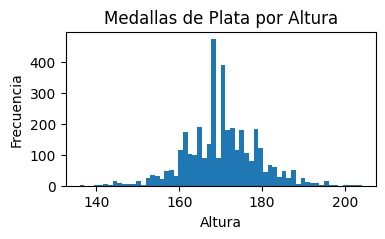

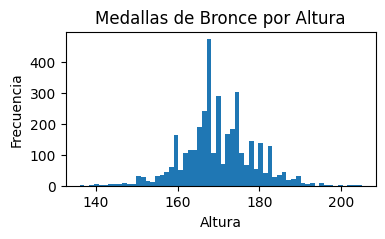

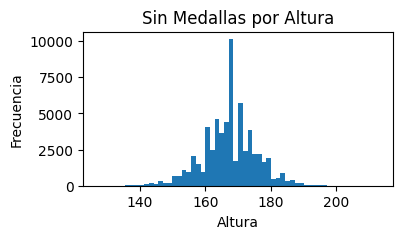

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Altura')
plt.show()

**a - Oro**

In [ ]:
df_M_Oro.Height.describe() # Valores Estadísticos

count    3747.000000
mean      170.499635
std         8.847278
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       210.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Oro.Height) # Moda

167.83973997447237

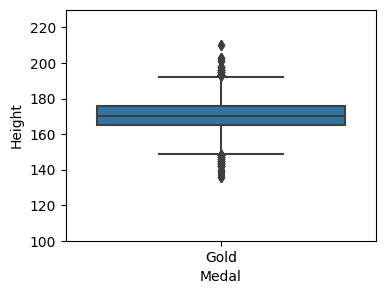

In [ ]:
# Valores Atípicos 
var = 'Height'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**b - Plata**

In [ ]:
df_M_Plata.Height.describe() # Valores Estadísticos

count    3735.000000
mean      170.313877
std         8.643220
min       136.000000
25%       165.000000
50%       170.000000
75%       175.000000
max       204.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Plata.Height) # Moda

170.0

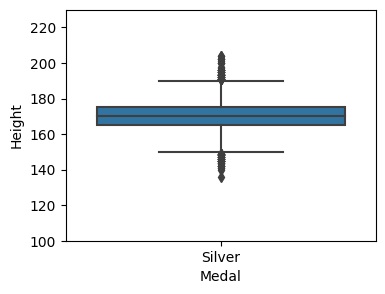

In [ ]:
# Valores Atípicos 
var = 'Height'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**c - Bronce**

In [ ]:
df_M_Bronce.Height.describe() # Valores Estadísticos

count    3771.000000
mean      170.067975
std         8.596217
min       136.000000
25%       165.000000
50%       170.000000
75%       175.000000
max       205.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Bronce.Height) # Moda

170.0

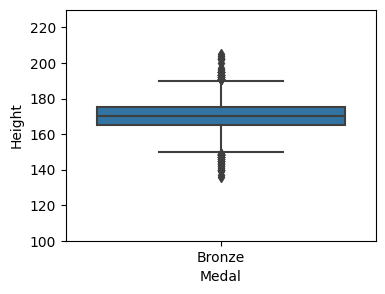

In [ ]:
# Valores Atípicos
var = 'Height'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**4 - Sin medalla**

In [ ]:
df_M_Sin_M.Height.describe() # Valores Estadísticos

count    63269.000000
mean       167.403346
std          8.206945
min        127.000000
25%        163.000000
50%        167.839740
75%        172.000000
max        213.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Sin_M.Height) # Moda

167.83973997447237

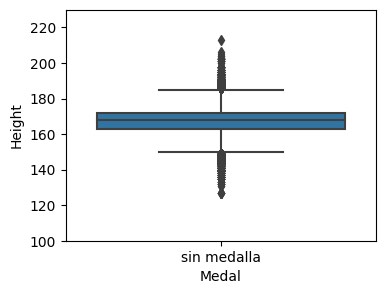

In [ ]:
# Valores Atípicos
var = 'Height'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**Insight 9:** La altura promedio de las atletas que obtienen algún tipo de medalla es 170 cm.

**Insight 10:** La altura promedio de las atletas que no obtienen medallas es de 167 cm. 

**Insight 11:** La altura mínima de las atletas que obtuvieron medallas es de 136 cm.

**Insight 12:** La altura mínima de las atletas que no obtuvieron medallas es de 127 cm. 

**Insight 13:** Hasta los 175 cm de altura se acumula el 75% de las altletas que obtienen medalla de oro. 

**Insight 14:** Hasta los 175 cm de altura se acumula el 75% de las altletas que obtienen medalla de plata.

**Insight 15:** Hasta los 175 cm de altura se acumula el 75% de las altletas que obtienen medalla de bronce.

**Insight 16:** Hasta los 172 cm de altura se acumula el 75% de las altletas que no obtienen medallas.

**Insight 17:** La desviación estándar de altura para todas las cartegorías está alrededor de los 8 cm. 

**Insight 18:** Las alturas más frecuentes de los medallistas de plata y bronce es de 170 cm. Las alturas más frecuentes del resto de los competidores (medallistas de oro y no medallistas) es de 167 cm.

**4 - Análisis del Peso de las Atletas**



**Distribución de las medallas según el peso de las atletas**

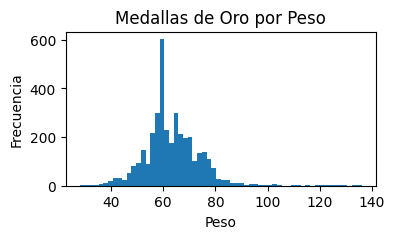

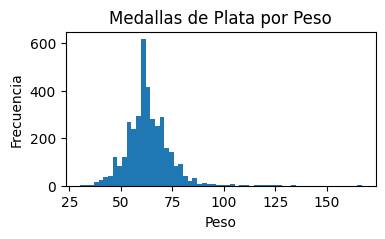

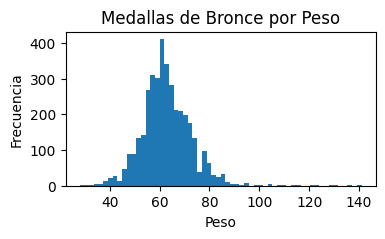

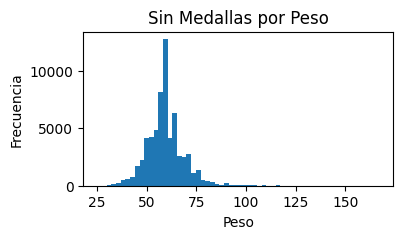

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Peso')
plt.show()

**a - Oro**

In [ ]:
df_M_Oro.Weight.describe() # Valores Estadísticos

count    3747.000000
mean       63.178700
std        10.592283
min        28.000000
25%        57.000000
50%        62.000000
75%        69.000000
max       136.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Oro.Weight) # Moda

60.021251741025296

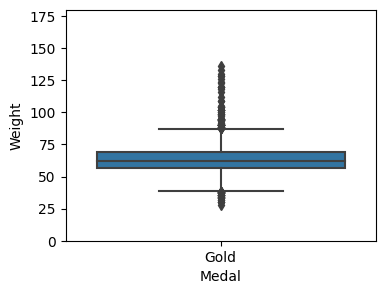

In [ ]:
# Valores atípicos
var = 'Weight'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**b - Plata**

In [ ]:
df_M_Plata.Weight.describe() # Valores Estadísticos

count    3735.000000
mean       62.918016
std        10.259378
min        30.000000
25%        57.000000
50%        61.000000
75%        68.000000
max       167.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Plata.Weight) # Moda

60.021251741025296

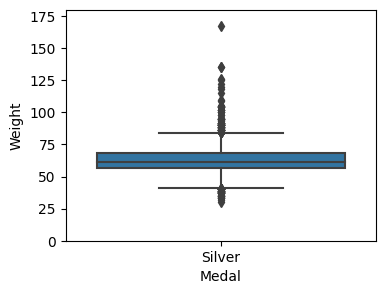

In [ ]:
# Valores Atípicos
var = 'Weight'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**c - Bronce**

In [ ]:
df_M_Bronce.Weight.describe() # Valores Estadísticos 

count    3771.000000
mean       62.794158
std         9.981382
min        28.000000
25%        57.000000
50%        62.000000
75%        68.000000
max       141.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Bronce.Weight) # Moda

60.021251741025296

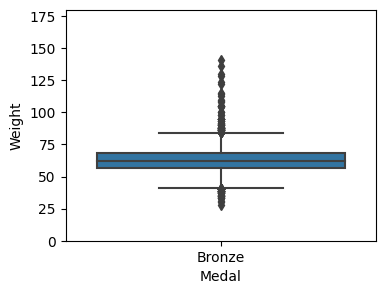

In [ ]:
# Valores Atípicos
var = 'Weight'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**d - Sin Medalla**

In [ ]:
df_M_Sin_M.Weight.describe() # Valores Estadísticos

count    63269.000000
mean        59.497978
std          9.457969
min         25.000000
25%         54.000000
50%         60.000000
75%         64.000000
max        167.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Sin_M.Weight) # Moda

60.021251741025296

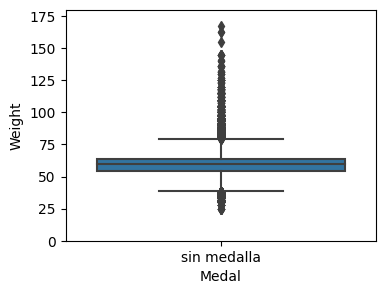

In [ ]:
# Valores atípicos
var = 'Weight'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**Insight 19:** El peso promedio de las atletas que obtienen una medalla de oro es 63 kilos.

**Insight 20:** El peso promedio de las atletas que obtienen una medalla de plata o de bronce es 62 kilos. 

**Insight 21:** El peso promedio de las atletas que no obtienen medalla es 59 kilos. 

**Insight 22:** Entre los 68 y 69 kilos de peso se acumula el 75% de las altletas que obtienen algún tipo de medalla. 

**Insight 23:** Hasta los 64 kilos de peso se acumula el 75% de las altletas que no obtienen ningún tipo de medalla.

**Insight 24:** El peso mas frecuente para todas las categorías es 60 kg.

**5 - Análisis de las medallas por NOC que representa a las atletas**

In [ ]:
tmp = df_M.groupby(['NOC', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

In [ ]:
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']
dfSM = df[df['Medal']== 'sin medalla']

In [ ]:
traceG = go.Bar(
    x = dfG['NOC'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['NOC'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['NOC'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['NOC'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['NOC'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['NOC'],
   # orientation = 'h'
)

traceSM = go.Bar(
    x = dfSM['NOC'],y = dfSM['ID'],
    name="sin medalla",
    marker=dict(
                color='red',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfSM['NOC'],
   # orientation = 'h'
)
data = [traceG, traceS, traceB, traceSM]
layout = dict(title = 'Medallas por NOC',
          xaxis = dict(title = 'NOC', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Número de medallas'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=1200,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='Medal')

**Insight 25:** El NOC "USA" ha obtenido históricamente mayor cantidad de medallas, pero también se registra mayor participación de atletas que representan ese Comité. Se debe realizar un análisis relativo entre la cantidad de preseas obtenidas en relación a los atletas participantes.

**Nota para el Profesor/Tutor:** Este gráfico fue replicado de un notebook publicado en Kaggle (https://www.kaggle.com/code/gpreda/plotly-tutorial-120-years-of-olympic-games/notebook#Medals) 

Se han adaptado las variables pero no es un desarrollo propio o que se haya visto en el curso. Se agrega porque se considera muy práctico para la interpretación de esta distribución. 

**FEATURE SELECTION**

**1 - Selección de las características para reducir la dimensionalidad del conjunto a fin de mejorar su rendimiento.**

In [ ]:
df_M

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,sin medalla
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",sin medalla
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [ ]:
df_M.columns # Vemos las columnas de df

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**2 - Codificación de las variables "Medal" y "NOC", "Sport" y "Season"**

In [ ]:
df_M_Cod=df_M # Se crea un df denominado df_M_Cod 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# NOC
encoder = OrdinalEncoder(categories=[["CHN", "DEN", "NED", "USA", "FIN", "NOR", "ROU", "EST", "FRA", "MAR", "ESP", "EGY", "IRI", "BUL", "ITA", "CHA", "AZE", "SUD", "RUS", "ARG", "CUB", "BLR", "GRE", "CMR", "TUR", "CHI", "MEX", "URS", "NCA", "HUN", "NGR", "ALG", "KUW", "BRN", "PAK", "IRQ", "UAR", "LIB", "QAT", "MAS", "GER", "CAN", "IRL", "AUS", "RSA", "ERI", "TAN", "JOR", "TUN", "LBA", "BEL", "DJI", "PLE", "COM", "KAZ", "BRU", "IND", "KSA", "SYR", "MDV", "ETH", "UAE", "YAR", "INA", "PHI", "SGP", "UZB", "KGZ", "TJK", "EUN", "JPN", "CGO", "SUI", "BRA", "FRG", "GDR", "MON", "ISR", "URU", "SWE", "ISV", "SRI", "ARM", "CIV", "KEN", "BEN", "UKR", "GBR", "GHA", "SOM", "LAT", "NIG", "MLI", "AFG", "POL", "CRC", "PAN", "GEO", "SLO", "CRO", "GUY", "NZL", "POR", "PAR", "ANG", "VEN", "COL", "BAN", "PER", "ESA", "PUR", "UGA", "HON", "ECU", "TKM", "MRI", "SEY", "TCH", "LUX", "MTN", "CZE", "SKN", "TTO", "DOM", "VIN", "JAM", "LBR", "SUR", "NEP", "MGL", "AUT", "PLW", "LTU", "TOG", "NAM", "AHO", "ISL", "ASA", "SAM", "RWA", "DMA", "HAI", "MLT", "CYP", "GUI", "BIZ", "YMD", "KOR", "THA", "BER", "ANZ", "SCG", "SLE", "PNG", "YEM", "IOA", "OMA", "FIJ", "VAN", "MDA", "YUG", "BAH", "GUA", "SRB", "IVB", "MOZ", "CAF", "MAD", "MAL", "BIH", "GUM", "CAY", "SVK", "BAR", "GBS", "TLS", "COD", "GAB", "SMR", "LAO", "BOT", "ROT", "CAM", "PRK", "SOL", "SEN", "CPV", "CRT", "GEQ", "BOL", "SAA", "AND", "ANT", "ZIM", "GRN", "HKG", "LCA", "FSM", "MYA", "MAW", "ZAM", "RHO", "TPE", "STP", "MKD", "BOH", "TGA", "LIE", "MNE", "GAM", "COK", "ALB", "WIF", "SWZ", "BUR", "NBO", "BDI", "ARU", "NRU", "VNM", "VIE", "BHU", "MHL", "KIR", "UNK", "TUV", "NFL", "KOS", "SSD", "LES"]]) # Creamos el codificador indicando el orden de la variables


In [ ]:
encoder.fit(df_M_Cod[["NOC"]])
df_M_Cod["NOC_Code"] = encoder.transform(df_M_Cod[["NOC"]])

In [ ]:
# Sport
encoder = OrdinalEncoder(categories=[["Basketball","Judo","Football","Tug-Of-War","Speed Skating","Cross Country Skiing","Athletics","Ice Hockey","Swimming","Badminton","Sailing","Biathlon","Gymnastics","Art Competitions","Alpine Skiing","Handball","Weightlifting","Wrestling","Luge","Water Polo","Hockey","Rowing","Bobsleigh","Fencing","Equestrianism","Shooting","Boxing","Taekwondo","Cycling","Diving","Canoeing","Tennis","Modern Pentathlon","Figure Skating","Golf","Softball","Archery","Volleyball","Synchronized Swimming","Table Tennis","Nordic Combined","Baseball","Rhythmic Gymnastics","Freestyle Skiing","Rugby Sevens","Trampolining","Beach Volleyball","Triathlon","Ski Jumping","Curling","Snowboarding","Rugby","Short Track Speed Skating","Skeleton","Lacrosse","Polo","Cricket","Racquets","Motorboating","Military Ski Patrol","Croquet","Jeu De Paume","Roque","Alpinism","Basque Pelota","Aeronautics"]])

In [ ]:
encoder.fit(df_M_Cod[["Sport"]])
df_M_Cod["Sport_Code"] = encoder.transform(df_M_Cod[["Sport"]])

In [ ]:
# Season
encoder = OrdinalEncoder(categories=[["Summer", "Winter"]]) 

In [ ]:
encoder.fit(df_M_Cod[["Season"]])
df_M_Cod["Season_Code"] = encoder.transform(df_M_Cod[["Season"]])

In [ ]:
# Medal
encoder = OrdinalEncoder(categories=[["sin medalla","Bronze","Silver","Gold"]]) # Creamos el codificador indicando el orden de la variables

In [ ]:
encoder.fit(df_M_Cod[["Medal"]])
df_M_Cod["Medal_Code"] = encoder.transform(df_M_Cod[["Medal"]])

In [ ]:
df_M_Cod

,ID,Name,Sex,Age,Height,...,Medal,NOC_Code,Sport_Code,Season_Code,Medal_Code
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,sin medalla,2.0,4.0,1.0,0.0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,sin medalla,2.0,4.0,1.0,0.0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,sin medalla,2.0,4.0,1.0,0.0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,sin medalla,2.0,4.0,1.0,0.0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,sin medalla,2.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Bronze,27.0,6.0,0.0,1.0
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,sin medalla,22.0,17.0,0.0,0.0
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Bronze,18.0,6.0,0.0,1.0
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Silver,18.0,6.0,0.0,2.0


**3 - Eliminación de las columnas que no nos interesan**

Se eliminan las siguientes columnas por no ser consideradas determinantes del desempeño:

**ID:** No es un dato propio de la performance.

**Name:** No es un dato característico de la performance.

**Sex:** No es dato característico de la performance dado que en este estudio se analiza la obtención de medallas por atletas mujeres.

**Team:** Se toma el NOC al cual representa el atelta, en lugar del país. 

**Games:** La ciudad y año del evento no es determinante de la performance para el conjunto.

**Year:** El año no es característico de la performance de una atleta.

**Event:** Inicialmente se toma el deporte (Sport) sin considerar la competencia.

**Medal:** Se ha reemplazado por la columna "Medal_Code".

**Sport:** Se ha reemplazado por la columna "Sport_Code"

**Season:** Se ha reemplazado por la columna "Season_Code"

**NOC:** Se ha reemplazado por la columna "NOC_Code"

**4 - Creación del nuevo dataframe df_M_1**

In [ ]:
df_M_1=df_M_Cod.drop(['ID','Name', 'Sex', 'Team', 'Games', 'NOC', 
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'], axis=1)

In [ ]:
df_M_1

,Age,Height,Weight,NOC_Code,Sport_Code,Season_Code,Medal_Code
4,21.0,185.0,82.0,2.0,4.0,1.0,0.0
5,21.0,185.0,82.0,2.0,4.0,1.0,0.0
6,25.0,185.0,82.0,2.0,4.0,1.0,0.0
7,25.0,185.0,82.0,2.0,4.0,1.0,0.0
8,27.0,185.0,82.0,2.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...
271080,33.0,168.0,80.0,27.0,6.0,0.0,1.0
271099,36.0,171.0,63.0,22.0,17.0,0.0,0.0
271102,19.0,171.0,64.0,18.0,6.0,0.0,1.0
271103,23.0,171.0,64.0,18.0,6.0,0.0,2.0


**5) Definición de X e y**

In [ ]:
X = df_M_1.drop("Medal_Code", 1)       # Matrtiz de características
y = df_M_1['Medal_Code']               # Caracerística objetivo
df_M_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Age,Height,Weight,NOC_Code,Sport_Code,Season_Code,Medal_Code
4,21.0,185.0,82.0,2.0,4.0,1.0,0.0
5,21.0,185.0,82.0,2.0,4.0,1.0,0.0
6,25.0,185.0,82.0,2.0,4.0,1.0,0.0
7,25.0,185.0,82.0,2.0,4.0,1.0,0.0
8,27.0,185.0,82.0,2.0,4.0,1.0,0.0


In [ ]:
df_M_1 = df_M_1.reindex(columns=['Age','Height','Weight','NOC_Code','Medal_Code']) # Reindexación para dejar la variable "Medal_Code" en última posición
df_M_1

,Age,Height,Weight,NOC_Code,Medal_Code
4,21.0,185.0,82.0,2.0,0.0
5,21.0,185.0,82.0,2.0,0.0
6,25.0,185.0,82.0,2.0,0.0
7,25.0,185.0,82.0,2.0,0.0
8,27.0,185.0,82.0,2.0,0.0
...,...,...,...,...,...
271080,33.0,168.0,80.0,27.0,1.0
271099,36.0,171.0,63.0,22.0,0.0
271102,19.0,171.0,64.0,18.0,1.0
271103,23.0,171.0,64.0,18.0,2.0


In [ ]:
X # Visualización de la matriz de caracteríticas

,Age,Height,Weight,NOC_Code,Sport_Code,Season_Code
4,21.0,185.0,82.0,2.0,4.0,1.0
5,21.0,185.0,82.0,2.0,4.0,1.0
6,25.0,185.0,82.0,2.0,4.0,1.0
7,25.0,185.0,82.0,2.0,4.0,1.0
8,27.0,185.0,82.0,2.0,4.0,1.0
...,...,...,...,...,...,...
271080,33.0,168.0,80.0,27.0,6.0,0.0
271099,36.0,171.0,63.0,22.0,17.0,0.0
271102,19.0,171.0,64.0,18.0,6.0,0.0
271103,23.0,171.0,64.0,18.0,6.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          74522 non-null  float64
 1   Height       74522 non-null  float64
 2   Weight       74522 non-null  float64
 3   NOC_Code     74522 non-null  float64
 4   Sport_Code   74522 non-null  float64
 5   Season_Code  74522 non-null  float64
dtypes: float64(6)
memory usage: 4.0 MB


In [ ]:
y # Visualización de la caracterítica objetivo

4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
         ... 
271080    1.0
271099    0.0
271102    1.0
271103    2.0
271110    0.0
Name: Medal_Code, Length: 74522, dtype: float64

**6) Selección**

In [ ]:
import statsmodels.api as sm # Aplicación del modelo

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be ke

['Weight', 'NOC_Code', 'Sport_Code', 'Season_Code', 'Height', 'Age']

Las funciones en el conjunto de datos que más contribuyen a la variable objetivo son: **'Weight', 'NOC_Code', 'Sport_Code', 'Season_Code', 'Height', 'Age'**

**EVALUACIÓN DE MODELOS ML**

**1 - Arbol de decisión**

In [ ]:
features_response = df_M_1.columns.tolist() # Listado las características
features_response


['Age', 'Height', 'Weight', 'NOC_Code', 'Medal_Code']

In [3]:
df_M_1.groupby('Medal_Code')['Age'].count()/len(df_M_1) # Frecuencia relativa de cada color de medalla

NameError: ignored

In [ ]:
# Librerias para la declaración y ajuste del modelo
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Separación al dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df_M_1[features_response[:-1]].values, df_M_1['Medal_Code'].values,
                 test_size=0.2, random_state=24)

NameError: ignored

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=4) # Definición del modelo

In [ ]:
dt.fit(X_train, y_train) # Ajuste el modelo

DecisionTreeClassifier(max_depth=4)

In [ ]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=features_response[:-1],
                                proportion=True,
                                class_names=[
                                    'sin medalla', 'Bronce', 'Silver', 'Gold'])

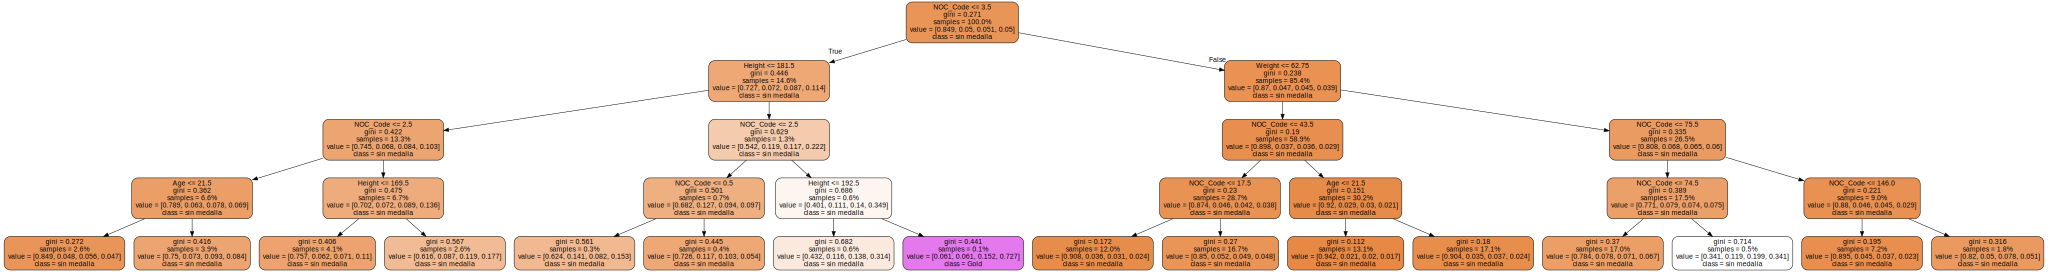

In [ ]:
graph = graphviz.Source(dot_data) # Creación del árbol
graph

**2 - Random Forest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
# Creación de modelo Random Forest con parámetros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtención de las predicciones del modelo con X_test y X_train
preds = modelo.predict(X_test)
preds_1 = modelo.predict(X_train)

**3 - Matriz de Confusión**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 1000x600 with 0 Axes>

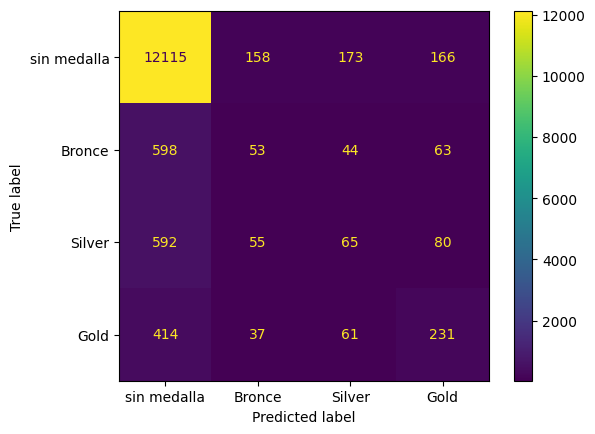

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['sin medalla', 'Bronce', 'Silver', 'Gold'])

El modelo predice correctamente 12.115 no medallistas que no obtuvieran medalla, 56 medallistas de bronce que obtuvieron medalla de Bronce, 65 medallistas de plata que obtuvieron medalla de Plata y 231 medallistas de oro que obtuvieorn preseas de Oro. 

Asimismo predice incorrectamente como no medallistas 598 atletas que obtuvieron Bronce, 592 que obtuvieron Plata y 414 que obtuvieron Oro. 

También se visualizan el resto de las combinaciones de predicciones

**a) Comparación de Matriz de Confusión con conjunto de entrenamiento y de prueba**

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds) # Conjunto de Prueba
confusion

array([[12115,   158,   173,   166],
       [  598,    53,    44,    63],
       [  592,    55,    65,    80],
       [  414,    37,    61,   231]])

In [ ]:
confusion = metrics.confusion_matrix(y_train, preds_1) # Conjunto de Entrenamiento
confusion

array([[50316,   115,   100,   126],
       [  809,  2059,    65,    80],
       [  706,    64,  2054,   119],
       [  525,    50,    78,  2351]])

**4 - Métricas**

**a - Accuarcy: Exactitud (Porcentaje de elementos clasificados correctamente)**

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds) # Conjunto de Prueba 
accuracy 

0.836229453203623

In [ ]:
accuracy = metrics.accuracy_score(y_train, preds_1) # Conjunto de Entrenamiento
accuracy 

0.952412902360065

**El conjunto de entranamimento clasifica correctamente los elementos con 0.95 de exactitud, mientras que el de prueba lo hace con un 0.83. Ambos valores son aceptables pero el de prueba es algo menor, lo que podría indicarnos  Underfitting, esto es para el conjunto de características.**

Revisamos las métricas para cada categoría.

**b - Precisión (sin medalla - bronce - plata - oro)**

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, preds, average=None) # Conjunto de Prueba

array([0.88308186, 0.17491749, 0.18950437, 0.42777778])

In [ ]:
precision_score(y_train, preds_1, average=None) # Conjunto de Entrenamiento

array([0.96103598, 0.89991259, 0.89420984, 0.87855007])

**El conjunto de entrenamiento ha clasificado correctamente el 0.96, 0.89, 0.89 y 0.87 de las muestras como "sin medalla", "bronce", "plata y "oro" respectivamente. Si comparamos esas mediciones con las obtenidas en el conjunto de prueba, estas son significativamene menores para las categorías "bronce", "plata y "oro". No así para la clase "sin medalla" que es la mayoritaria en el conjunto de datos que se torna desbalanceado.**

**c - Sensibilidad (Verdaderos positivos) (sin medalla - bronce - plata - oro)**

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, preds, average=None) # Conjunto de Prueba

array([0.96059309, 0.06992084, 0.08207071, 0.31090175])

In [ ]:
recall_score(y_train, preds_1, average=None) # Conjunto de Entrenamiento

array([0.99326845, 0.68337205, 0.69792729, 0.78262317])

**La tasa de verdaderos positivos para el conjunto de entrenamiento es del 0.99, 0.68, 0.69 y 0.78 para las clases "sin medalla", "bronce", "plata" y "oro" respectivamente. En cambio en el conjunto de prueba las métricas para "bronce", "plata" y "oro" son bastante menores. Nuevamente esto no se cumple para la clase mayoritaria "sin medalla" que conserva en el conjunto de prueba un alto score.**


**d - F1 Score (Precisión y Sensibilidad)**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, preds, average=None) # Conjunto de Prueba

array([0.92020812, 0.09990575, 0.11453744, 0.36009353])

In [ ]:
f1_score(y_train, preds_1, average=None) # Conjunto de Entrenamiento

array([0.97688641, 0.77683456, 0.78396947, 0.8278169 ])

**Nuevamente se cumple que la métrica tiene una buena performance en ambos conjuntos para clase mayoritaria detectando confiablemente la clase "sin medalla", no así para el resto.**

In [ ]:
# Todas las métricas sobre el conjunto de Prueba (sin medalla - bronce - plata  oro)
print(metrics.classification_report(y_test, preds)) # Conjunto de Prueba

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     12612
         1.0       0.17      0.07      0.10       758
         2.0       0.19      0.08      0.11       792
         3.0       0.43      0.31      0.36       743

    accuracy                           0.84     14905
   macro avg       0.42      0.36      0.37     14905
weighted avg       0.79      0.84      0.81     14905



In [ ]:
# Todas las métricas sobre el conjunto de entrenamiento (sin medalla - bronce - plata - oro)
print(metrics.classification_report(y_train, preds_1)) # Conjunto de Entrenamiento

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     50657
         1.0       0.90      0.68      0.78      3013
         2.0       0.89      0.70      0.78      2943
         3.0       0.88      0.78      0.83      3004

    accuracy                           0.95     59617
   macro avg       0.91      0.79      0.84     59617
weighted avg       0.95      0.95      0.95     59617



**5 - Conclusiones: Se puede afirmar que el modelo tiene buena performance en el conjunto de entrenamiento para todas las clases, pero para el conjunto de prueba la performance de las categorías minoritarias ("bronce", "plata" y "oro") disminuye drásticamente. Se concluye que el modelo está subajustado (Underfitting)**

**6 - Acciones correctivas propuestas**

a) Remediar el desbalance de los datos

b) Verificar los reemplazos de valores NAN o vacíos por criterios distintos a la media (quizás la influencia de los promedios asignados a los valores nulos puede haber diluído su importancia en el conjunto y que no se presente como una característica determinante)

c) Dar tratamiento a los outliers

d) Revisar las variables intervinientes

e) Efectuar análisis más complejos, segmentando por otras características

*Claudia Beatriz Perez Lorenzo*

*25/08/2022*